# Demonstration of Time Functions
This notebook demonstrates the behavior of various time-dependent functions implemented as subclasses of `TimeFnBase`.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from time_fn import (
    TimeFnStepLoading, TimeFnMonotonicAscending, TimeFnCycleSinus, TimeFnCycleLinear,
    TimeFnCycleWithRamps, TimeFnPeriodic, TimeFnStepping, TimeFnOverlay
)

## Define a Time Array
We will use a common time array for all demonstrations.

In [2]:
# Define a time array
time = np.linspace(0, 10, 1000)  # 0 to 10 seconds, 1000 points

## Step Loading
Demonstrate the behavior of the `TimeFnStepLoading` function.

<IPython.core.display.Math object>

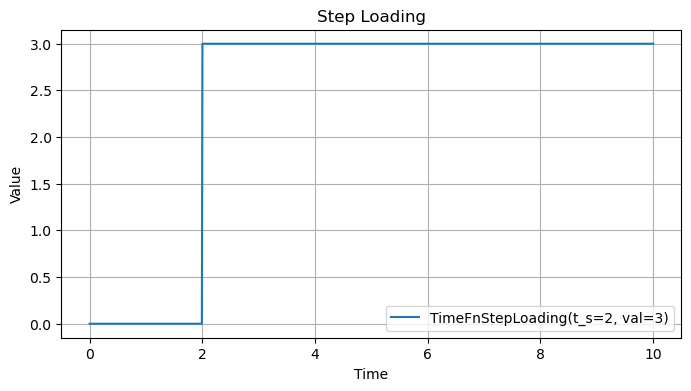

In [5]:
# TimeFnStepLoading function
step_fn = TimeFnStepLoading(t_s=2.0, val=3.0)
step_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
step_fn.plot(ax, time)

## Monotonic Ascending
Demonstrate the behavior of the `TimeFnMonotonicAscending` function.

<IPython.core.display.Math object>

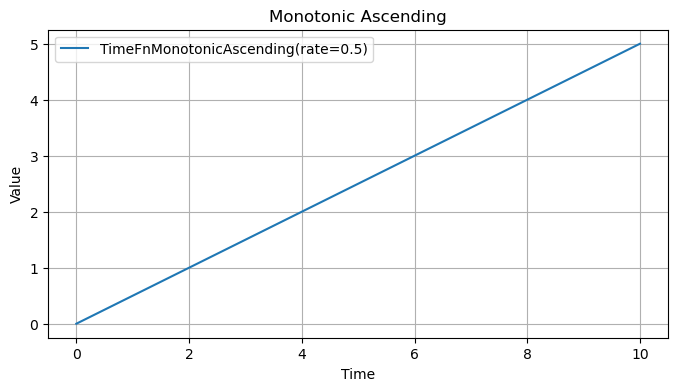

In [6]:
# TimeFnMonotonicAscending function
monotonic_fn = TimeFnMonotonicAscending(rate=0.5)
monotonic_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
monotonic_fn.plot(ax, time)

## Cyclic Sinusoidal
Demonstrate the behavior of the `TimeFnCycleSinus` function.

<IPython.core.display.Math object>

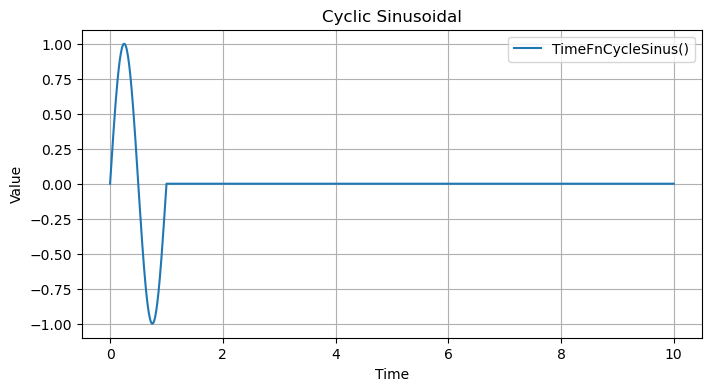

In [7]:
# TimeFnCycleSinus function
sinusoidal_fn = TimeFnCycleSinus()
sinusoidal_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
sinusoidal_fn.plot(ax, time)

## Cyclic Saw Tooth
Demonstrate the behavior of the `TimeFnCycleLinear` function.

<IPython.core.display.Math object>

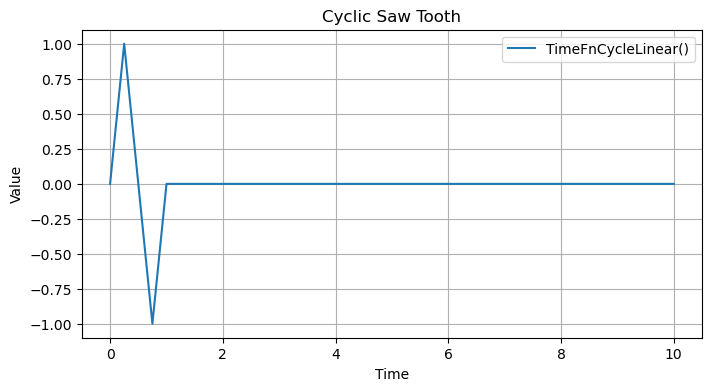

In [8]:
# TimeFnCycleLinear function
saw_tooth_fn = TimeFnCycleLinear()
saw_tooth_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
saw_tooth_fn.plot(ax, time)

## Periodic Time Function with Cyclic Saw Tooth
Demonstrate the behavior of the `TimeFnPeriodic` function using `TimeFnCycleLinear` (Saw Tooth) as the cycle.

<IPython.core.display.Math object>

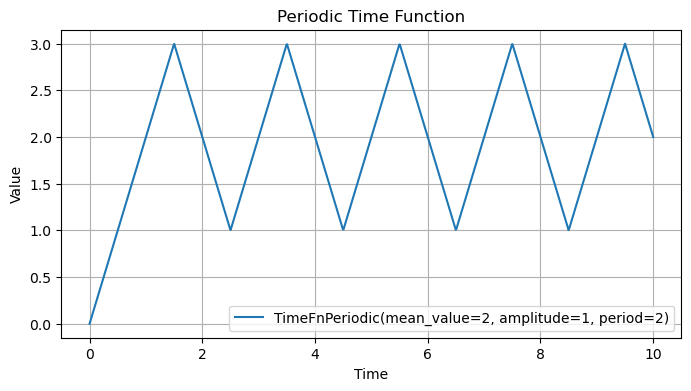

In [9]:
periodic_saw_fn = TimeFnPeriodic(mean_value=2, amplitude=1, period=2, time_fn_cycle=saw_tooth_fn)
periodic_saw_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
periodic_saw_fn.plot(ax, time)

## Cyclic With Ramps
Demonstrate the behavior of the `TimeFnCycleWithRamps` function.

<IPython.core.display.Math object>

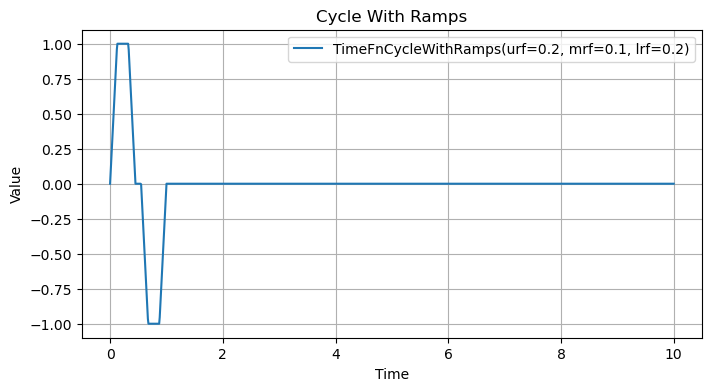

In [10]:
cycle_with_ramps_fn = TimeFnCycleWithRamps(urf=0.2, mrf=0.1, lrf=0.2)
cycle_with_ramps_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
cycle_with_ramps_fn.plot(ax, time)

## Periodic Time Function with Cyclic With Ramps
Demonstrate the behavior of the `TimeFnPeriodic` function using `TimeFnCycleWithRamps` as the cycle.

<IPython.core.display.Math object>

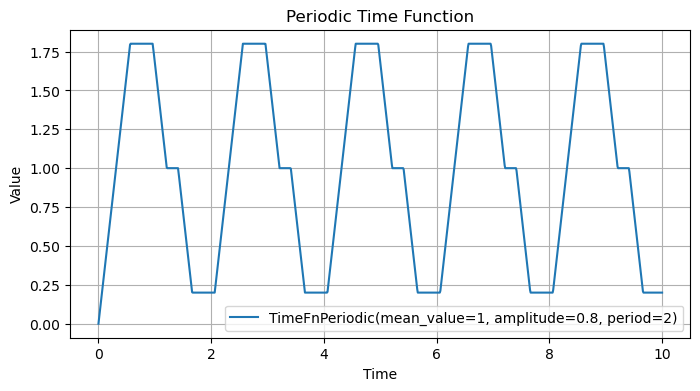

In [11]:
periodic_ramps_fn = TimeFnPeriodic(mean_value=1, amplitude=0.8, period=2, time_fn_cycle=cycle_with_ramps_fn)
periodic_ramps_fn.time_fn_cycle.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
periodic_ramps_fn.plot(ax, time)

## Periodic Time Function
Demonstrate the behavior of the `TimeFnPeriodic` function.

In [12]:
periodic_fn = TimeFnPeriodic(mean_value=3, amplitude=1, period=2, time_fn_cycle=sinusoidal_fn)
periodic_fn.display_sym()

<IPython.core.display.Math object>

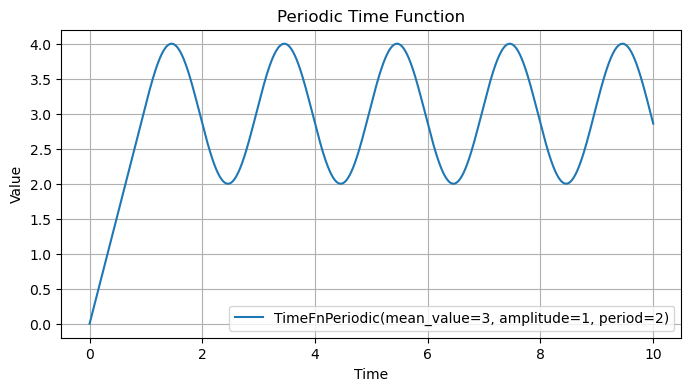

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
periodic_fn.plot(ax, time)

## Stepping Function Example

<IPython.core.display.Math object>

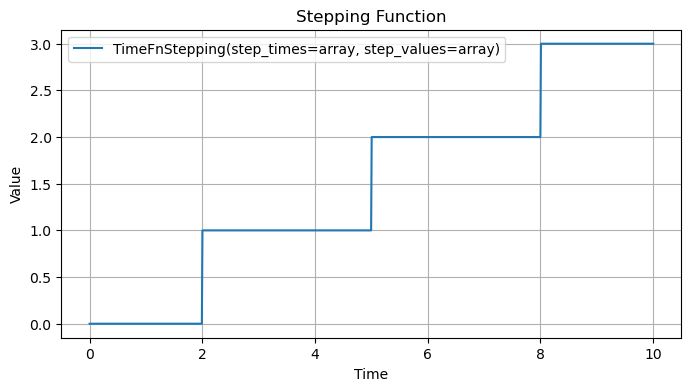

In [14]:
step_times = np.array([0.0, 2.0, 5.0, 8.0])
step_values = np.array([0.0, 1.0, 2.0, 3.0])
fn_step = TimeFnStepping(step_times=step_times, step_values=step_values)
fn_step.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
fn_step.plot(ax, time)

## Overlay: Stepping with Periodic (Sinusoidal) Function

In [15]:
cycle_fn = TimeFnCycleSinus()
periodic_fn = TimeFnPeriodic(time_fn_cycle=cycle_fn, amplitude=0.5, mean_value=1.0, period=1.0)
overlay_fn = TimeFnOverlay(fn1=fn_step, fn2=periodic_fn)
fn_step.symb_expr

<IPython.core.display.Math object>

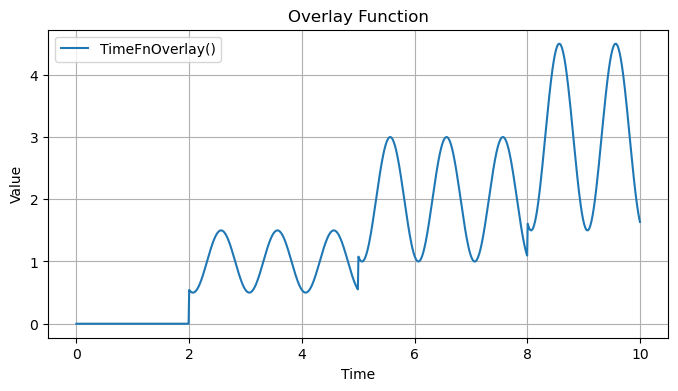

In [16]:
overlay_fn.display_sym()
fig, ax = plt.subplots(figsize=(8, 4))
overlay_fn.plot(ax, time)